#  IA para Redes de Suministro 

üë§ **Autor:** John Leonardo Vargas Mesa  
üîó [LinkedIn](https://www.linkedin.com/in/leonardovargas/) | [GitHub](https://github.com/LeStark)  

## üìÇ Repositorio en GitHub  
- üìì **Notebooks:** [Acceder aqu√≠](https://github.com/LeStark/Cursos/tree/main/An%C3%A1lisis%20predictivo%20para%20toma%20de%20decisiones%20RRHH)  
- üìë **Data sets:** [Acceder aqu√≠](https://github.com/LeStark/Cursos/tree/main/Data/RRHH)  
---


# üìò Notebook 3 ‚Äì Introducci√≥n a Redes Neuronales: Clasificaci√≥n de Proveedores  

En este notebook daremos nuestros primeros pasos en el uso de redes neuronales artificiales (RNA) aplicadas a la clasificaci√≥n de proveedores dentro de una cadena de suministro.  

Partiremos del dataset previamente preprocesado y listo para modelar del [Notebook 01](https://github.com/LeStark/Cursos/blob/main/02%20-%20IA4SC/Notebook%2001%20Introducci%C3%B3n%20ML%20supervisado%20y%20no%20supervisado.ipynb), con el fin de entrenar una red neuronal sencilla que permita diferenciar a los proveedores seg√∫n su desempe√±o y caracter√≠sticas clave.  

### üìÇ Estructura del Dataset  

El dataset contiene informaci√≥n simulada de proveedores, con variables como:  

- **Tiempos de entrega**: desempe√±o del proveedor en cumplir los plazos.  
- **Calidad del producto**: medici√≥n de est√°ndares de cumplimiento.  
- **Flexibilidad**: capacidad de adaptarse a cambios en el pedido.  
- **Costo relativo**: nivel de precios frente a la competencia.  
- **Categor√≠a de proveedor**: variable objetivo (ej. confiable, regular, cr√≠tico).  

Estas variables se usar√°n como insumo para la red neuronal que entrenaremos en este notebook.  

### üéØ Objetivos del Notebook  

- Recordar el proceso de **preparaci√≥n de datos** (codificaci√≥n y estandarizaci√≥n).  
- Explicar los **conceptos b√°sicos de redes neuronales**:  
  - Neuronas, capas y funciones de activaci√≥n.  
  - Propagaci√≥n hacia adelante y retropropagaci√≥n.  
- Implementar un **modelo de red neuronal simple** usando `scikit-learn` o `keras`.  
- Entrenar la red neuronal para **clasificar proveedores** en distintas categor√≠as.  
- Evaluar el desempe√±o del modelo con m√©tricas de clasificaci√≥n.  

### üõ†Ô∏è Herramientas a utilizar  

- **pandas** y **numpy**: manipulaci√≥n de datos.  
- **scikit-learn**: utilidades para partici√≥n de datos y m√©tricas de evaluaci√≥n.  
- **tensorflow / keras**: construcci√≥n y entrenamiento de redes neuronales.  
- **matplotlib** y **seaborn**: visualizaci√≥n de resultados y m√©tricas.  

Al finalizar este notebook, contar√°s con tu **primer modelo de red neuronal entrenado**, capaz de clasificar proveedores en diferentes categor√≠as y con el potencial de ser mejorado en notebooks posteriores.  


In [3]:
# Librer√≠as principales para el proyecto

# Manipulaci√≥n y an√°lisis de datos
import pandas as pd
import numpy as np

# Visualizaci√≥n de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Utilidades matem√°ticas
import math

# Manejo de advertencias (para ocultar mensajes innecesarios)
import warnings
warnings.filterwarnings('ignore')

# Preprocesamiento de datos
from sklearn.preprocessing import LabelEncoder    # Codificaci√≥n de variables categ√≥ricas
from sklearn.preprocessing import StandardScaler  # Estandarizaci√≥n de variables num√©ricas

# Divisi√≥n de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Construcci√≥n y entrenamiento de modelos de redes neuronales
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Evaluaci√≥n de modelos
from sklearn.metrics import (
    confusion_matrix,          # Matriz de confusi√≥n
    ConfusionMatrixDisplay,    # Visualizaci√≥n de la matriz de confusi√≥n
    classification_report,     # M√©tricas de precisi√≥n, recall y F1
    accuracy_score             # Exactitud global
)

# Guardado y carga de modelos entrenados
import joblib

### Transformaci√≥n de datos

En esta celda realizamos el **preprocesamiento completo del dataset de proveedores**.  
Primero cargamos los datos desde un repositorio en GitHub, luego transformamos la variable categ√≥rica **"categoria_proveedor"** en valores num√©ricos y, finalmente, **estandarizamos las variables num√©ricas** para que todas est√©n en la misma escala.  

El resultado es un dataset limpio y listo para ser usado en modelos de **Machine Learning** orientados a la clasificaci√≥n de proveedores.  


In [5]:
# üì• Carga del Dataset de Evaluaci√≥n de Proveedores
# ------------------------------------------------
# En esta celda cargamos un dataset adaptado del famoso Iris,
# pero reinterpretado en el contexto de cadenas de suministro.
# El archivo est√° almacenado en un repositorio de GitHub y lo
# leemos directamente con pandas usando pd.read_csv().

url = "https://raw.githubusercontent.com/LeStark/Cursos/refs/heads/main/00%20-%20Data/02%20-%20SC/iris_evaluacion_proveedores.csv"
data = pd.read_csv(url)

# üî§ Codificaci√≥n de la variable categ√≥rica
# -----------------------------------------
# Convertimos la variable categ√≥rica "categoria_proveedor"
# en valores num√©ricos para poder usarla en modelos de ML.

# 1Ô∏è Inicializamos el codificador
le = LabelEncoder()

# 2Ô∏è Ajustamos y transformamos la variable ‚Üí nueva columna
data["categoria_proveedor_num"] = le.fit_transform(data["categoria_proveedor"])

# 3Ô∏è Mostramos el mapeo categor√≠as ‚Üí n√∫meros
print(dict(zip(le.classes_, le.transform(le.classes_))))

# 4Ô∏è Eliminamos la columna original categ√≥rica
data = data.drop(columns=["categoria_proveedor"])


# üìä Estandarizaci√≥n de variables num√©ricas
# -----------------------------------------
# Seleccionamos las columnas num√©ricas a estandarizar
features = data.drop(columns=["categoria_proveedor_num"]).columns.tolist()

# 1Ô∏è Inicializamos el escalador
scaler = StandardScaler()

# 2Ô∏è Ajustamos y transformamos los datos
data_scaled = scaler.fit_transform(data[features])

# 3Ô∏è Convertimos a DataFrame con mismos nombres e √≠ndices
data_scaled = pd.DataFrame(data_scaled, 
                           columns=features, 
                           index=data.index)

# 4Ô∏è Concatenamos las variables estandarizadas con la variable codificada
data_final = pd.concat([data_scaled, data[["categoria_proveedor_num"]]], axis=1)

# 5Ô∏è Revisamos las primeras filas del dataset final
data_final.head()


{'Proveedor Estrat√©gico': 0, 'Proveedor Ocasional': 1, 'Proveedor Regular': 2}


Tiempo_entrega_dias  Confiabilidad_entregas  Costos_de_transacci√≥n  \
0            -0.900681                1.019004              -1.340227   
1            -1.143017               -0.131979              -1.340227   
2            -1.385353                0.328414              -1.397064   
3            -1.506521                0.098217              -1.283389   
4            -1.021849                1.249201              -1.340227   

   Defectos_por_mill√≥n  categoria_proveedor_num  
0            -1.315444                        0  
1            -1.315444                        0  
2            -1.315444                        0  
3            -1.315444                        0  
4            -1.315444                        0

### Separaci√≥n de datos

En esta celda separamos el dataset en **variables predictoras (X)** y **variable objetivo (y)**.  
Posteriormente, dividimos los datos en **conjunto de entrenamiento (80%)** y **conjunto de prueba (20%)**, garantizando la **reproducibilidad** con `random_state` y manteniendo el **balance de clases** con `stratify`.  


In [11]:

# Definimos variables predictoras (X) y variable objetivo (y)
X = data_final.drop(columns=["categoria_proveedor_num"])

y = data_final["categoria_proveedor_num"]

# Separaci√≥n en train y test
# test_size=0.2 ‚Üí 20% de los datos para prueba, 80% para entrenamiento
# random_state=16 ‚Üí asegura reproducibilidad de la partici√≥n
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=16, stratify=y, shuffle=True
)

# Revisamos las dimensiones de los conjuntos resultantes
print("Tama√±o entrenamiento:", X_train.shape)
print("Tama√±o prueba:", X_test.shape)

Tama√±o entrenamiento: (120, 4)
Tama√±o prueba: (30, 4)


### üß† Construcci√≥n y compilaci√≥n del modelo de Red Neuronal  

En esta celda definimos y configuramos nuestra primera **Red Neuronal Artificial (RNA)** utilizando **Keras**.  

#### Arquitectura del modelo
- **`Sequential`**: el modelo se construye como una pila de capas, donde la salida de una es la entrada de la siguiente.  
- **Capas ocultas**:
  - 1 capa de entrada con **16 neuronas** y activaci√≥n `ReLU` (rectified linear unit), que ayuda a aprender relaciones no lineales.  
  - 4 capas intermedias, cada una con **32 neuronas** y activaci√≥n `ReLU`, para aumentar la capacidad de representaci√≥n del modelo.  
- **Capa de salida**:
  - 1 capa con **3 neuronas** y activaci√≥n `Softmax`, ideal para problemas de **clasificaci√≥n multiclase** (en este caso, 3 categor√≠as de proveedores).  

#### Compilaci√≥n del modelo
- **Optimizador `Adam`**: ajusta los pesos de la red de manera eficiente durante el entrenamiento.  
- **Funci√≥n de p√©rdida `sparse_categorical_crossentropy`**: adecuada cuando la variable objetivo es categ√≥rica con valores enteros.  
- **M√©trica `accuracy`**: nos indica el porcentaje de predicciones correctas durante el entrenamiento y la evaluaci√≥n.  

#### Resumen del modelo
Finalmente, con `model.summary()` obtenemos una tabla con:
- Capas de la red.  
- N√∫mero de par√°metros (pesos y sesgos) en cada capa.  
- Total de par√°metros entrenables del modelo.   


In [ ]:
# Definici√≥n de una Red Neuronal para clasificar proveedores
# ------------------------------------------------------------
# Usamos Keras y su API `Sequential`, que permite apilar capas de forma ordenada.
# La idea es construir un modelo de clasificaci√≥n multiclase (3 categor√≠as de proveedores).

model = keras.Sequential([
    # Capa de entrada
    # - 16 neuronas
    # - input_shape = n√∫mero de variables de entrada (columnas de X_train)
    # - activaci√≥n ReLU para introducir no linealidad
    layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)),

    # Capas ocultas intermedias
    # Cada capa con 32 neuronas y activaci√≥n ReLU
    # Estas capas aprenden representaciones progresivamente m√°s abstractas de los datos
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),

    # Capa de salida
    # - 3 neuronas (una por cada categor√≠a de proveedor)
    # - activaci√≥n Softmax ‚Üí devuelve probabilidades que suman 1
    layers.Dense(3, activation="softmax")
])

# Compilaci√≥n del modelo
# - Optimizador: Adam ‚Üí eficiente y ampliamente usado
# - Funci√≥n de p√©rdida: sparse_categorical_crossentropy (etiquetas enteras)
# - M√©trica: accuracy (precisi√≥n del modelo)
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Resumen de la arquitectura de la red neuronal
# Nos muestra las capas, el tama√±o de salida de cada una
# y el n√∫mero de par√°metros (pesos y sesgos) que se entrenar√°n
model.summary()


Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_6 (Dense)                 ‚îÇ (None, 16)             ‚îÇ            80 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_7 (Dense)                 ‚îÇ (None, 32)             ‚îÇ           544 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_8 (Dense)                 ‚îÇ (None, 32)             ‚îÇ         1,056 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_9 (Dense)                 ‚îÇ (None, 32)             ‚îÇ         1,056 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_10 (Dense)                ‚îÇ (None, 32)             ‚îÇ         1,056 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_11 (Dense)                ‚îÇ (None, 3)              ‚îÇ            99 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 3,891 (15.20 KB)

 Trainable params: 3,891 (15.20 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento de la red 

En esta celda entrenamos la **red neuronal** utilizando el m√©todo `.fit()`.  
El modelo aprende a clasificar proveedores mediante iteraciones sucesivas sobre los datos de entrenamiento.  

#### Par√°metros principales:  
- **epochs=100** ‚Üí el dataset se procesa completo 100 veces.  
- **batch_size=32** ‚Üí el modelo actualiza sus pesos cada 32 muestras.  
- **validation_split=0.2** ‚Üí el 20% de los datos de entrenamiento se usan para validar en cada √©poca.  
- **verbose=1** ‚Üí muestra una barra de progreso con m√©tricas en cada √©poca.  

El historial de entrenamiento se guarda en la variable `history`, lo que permitir√° **analizar gr√°ficamente la p√©rdida y la precisi√≥n** tanto en entrenamiento como en validaci√≥n.  


In [ ]:
# Entrenamiento del modelo de Red Neuronal
# -------------------------------------------
# Usamos el m√©todo .fit() para entrenar la red con los datos de entrenamiento.

history = model.fit(
    X_train,        # Variables predictoras de entrenamiento
    y_train,        # Variable objetivo de entrenamiento
    epochs=100,     # N√∫mero de veces que el modelo ver√° todo el dataset (√©pocas)
    batch_size=32,  # N√∫mero de muestras procesadas antes de actualizar los pesos
    validation_split=0.2,  # 20% de los datos de entrenamiento se usan para validar
    verbose=1       # Nivel de detalle en la salida (1 = muestra barra de progreso)
)

# El resultado se guarda en la variable "history", que contiene:
# - P√©rdida (loss) y exactitud (accuracy) en entrenamiento.
# - P√©rdida y exactitud en validaci√≥n (val_loss, val_accuracy).
# Esto nos permitir√° graficar y analizar c√≥mo aprendi√≥ el modelo.


Epoch 1/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 206ms/step - accuracy: 0.3646 - loss: 1.0840 - val_accuracy: 0.2083 - val_loss: 1.1073
Epoch 2/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - accuracy: 0.3646 - loss: 1.0564 - val_accuracy: 0.2083 - val_loss: 1.0712
Epoch 3/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 25ms/step - accuracy: 0.5521 - loss: 1.0307 - val_accuracy: 0.5000 - val_loss: 1.0401
Epoch 4/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 25ms/step - accuracy: 0.6667 - loss: 1.0049 - val_accuracy: 0.5833 - val_loss: 1.0086
Epoch 5/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step - accuracy: 0.6875 - loss: 0.9765 - val_accuracy: 0.5833 - val_loss: 0.9730
Epoch 6/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step - accuracy: 0.6875 - loss: 0.9441 - val_accuracy: 0.5833 - val_loss: 0.9318
Epo

In [17]:
# Evoluci√≥n del aprendizaje del modelo
# --------------------------------------

# Extraemos la informaci√≥n de entrenamiento y validaci√≥n desde el objeto history
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Definimos el n√∫mero de √©pocas (x-axis)
epochs = range(1, len(acc) + 1)

# Gr√°fica de precisi√≥n
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label="Entrenamiento", marker="o")
plt.plot(epochs, val_acc, label="Validaci√≥n", marker="o")
plt.title("Evoluci√≥n de la Precisi√≥n")
plt.xlabel("√âpocas")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Gr√°fica de p√©rdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label="Entrenamiento", marker="o")
plt.plot(epochs, val_loss, label="Validaci√≥n", marker="o")
plt.title("Evoluci√≥n de la P√©rdida")
plt.xlabel("√âpocas")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


En esta celda probamos el modelo con un **proveedor hipot√©tico**.  
Se definen valores de entrada, se **escalan con el mismo `scaler`** usado en el entrenamiento y se obtiene la **predicci√≥n de categor√≠a** mediante la red neuronal.  


In [14]:
# Definimos valores de entrada para un proveedor hipot√©tico
ejemplo = np.array([[5.0,   # Tiempo de entrega (d√≠as)
                     3.5,   # Confiabilidad en entregas
                     2.0,   # Costos de transacci√≥n
                     1.0]]) # Defectos por mill√≥n

# Escalamos los datos con el mismo scaler usado en el entrenamiento
ejemplo_scaled = scaler.transform(ejemplo)

# Realizamos la predicci√≥n
prediccion = model.predict(ejemplo_scaled)

print(prediccion)
# Convertimos la salida num√©rica a etiqueta
categoria_predicha = le.inverse_transform(np.argmax(prediccion, axis=1))[0]

print("üìä Categor√≠a de proveedor predicha:", categoria_predicha)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 79ms/step
[[9.9879682e-01 7.3865714e-08 1.2030565e-03]]
üìä Categor√≠a de proveedor predicha: Proveedor Estrat√©gico


In [15]:
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np

def predecir_proveedor(tiempo_entrega, confiabilidad, costos_transaccion, defectos_millon):
    # Construimos el array con los valores ingresados
    X_user = np.array([[tiempo_entrega, confiabilidad, costos_transaccion, defectos_millon]])
    X_user_scaled = scaler.transform(X_user)

    # Predicci√≥n con el modelo KNN entrenado
    prediction = model.predict(X_user_scaled)
    predicted_label = le.inverse_transform(np.argmax(prediction, axis=1))
    
    print("üìä Categor√≠a de proveedor predicha:", predicted_label[0])

# Sliders interactivos para cada variable
interact(
    predecir_proveedor,
    tiempo_entrega=widgets.FloatSlider(min=1, max=10, step=0.5, value=5, description="Entrega (d√≠as)"),
    confiabilidad=widgets.FloatSlider(min=2, max=5, step=0.1, value=3, description="Confiabilidad"),
    costos_transaccion=widgets.FloatSlider(min=0.5, max=5, step=0.1, value=2, description="Costos"),
    defectos_millon=widgets.FloatSlider(min=0.1, max=3.5, step=0.1, value=1, description="Defectos")
)

interactive(children=(FloatSlider(value=5.0, description='Entrega (d√≠as)', max=10.0, min=1.0, step=0.5), Float‚Ä¶

<function __main__.predecir_proveedor(tiempo_entrega, confiabilidad, costos_transaccion, defectos_millon)>

### Evaluaci√≥n

En esta celda evaluamos el desempe√±o del modelo sobre el **conjunto de prueba**.  
Se generan las **predicciones**, se construye la **matriz de confusi√≥n** y se calculan m√©tricas como **accuracy** y el **reporte de clasificaci√≥n** (precisi√≥n, recall y F1-score) para cada categor√≠a de proveedor.  


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 138ms/step


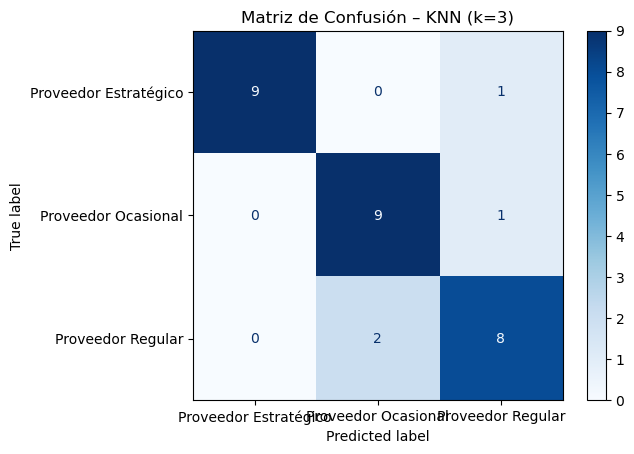

üîπ Accuracy: 0.8666666666666667

 Reporte de Clasificaci√≥n:

                       precision    recall  f1-score   support

Proveedor Estrat√©gico       1.00      0.90      0.95        10
  Proveedor Ocasional       0.82      0.90      0.86        10
    Proveedor Regular       0.80      0.80      0.80        10

             accuracy                           0.87        30
            macro avg       0.87      0.87      0.87        30
         weighted avg       0.87      0.87      0.87        30



In [16]:
#  1. Predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

#  2. Matriz de confusi√≥n
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))

# Visualizaci√≥n
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusi√≥n ‚Äì KNN (k=3)")
plt.show()

#  3. M√©tricas de desempe√±o
print("üîπ Accuracy:", accuracy_score(y_test, np.argmax(y_pred, axis=1)))
print("\n Reporte de Clasificaci√≥n:\n")
print(classification_report(y_test, np.argmax(y_pred, axis=1), target_names=le.classes_))